<a href="https://colab.research.google.com/github/eojin1978/jeju_master/blob/main/%EA%B3%BC%EC%A0%9C1_%EC%A0%95%EC%96%B4%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 탐색적데이터 분석

코로나가 극성이던 해(2021)에 영아사망원인의 변화는 어떤 모습일까?

In [ ]:
#한글 폰트 지정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

In [ ]:
#라이브러리 설치하고 확인하기

import pandas  as pd
import numpy as np
import matplotlib as plt
pd.__version__
np.__version__
plt.__version__

#데이터불러오기

In [5]:
#데이터 다운로드하기
#국가통계포털 사이트 https://kosis.kr/index/index.do
#영아사망원인(67항목)/성/생존기간별 사망자수, 영아사망률(2005~)

import pandas as pd

PATH = './sample_data/'
FILE = '영아사망원인_67항목__영아사망률.csv'

file = PATH+FILE
df = pd.read_csv(file, encoding = 'utf-8')
df.head(3)

,영아사망원인별(67항목),성별,생존기간별,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,영아사망원인별(67항목),성별,생존기간별,사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),...,사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명)
1,특정 감염성 및 기생충성 질환,계,계,30,25,14,15,28,29,19,...,13,17,7,17,13,4,9,6,10,13
2,신생물,계,계,25,30,29,20,21,17,17,...,19,14,12,14,13,15,6,4,4,5


---

#데이터 전처리하기

In [4]:
# 컬럼이름 변경하기
df.columns = ['영아사망원인', '성별', '생존기간별', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022']
df.columns
df.head(3)

,영아사망원인,성별,생존기간별,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,영아사망원인별(67항목),성별,생존기간별,사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),...,사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명)
1,특정 감염성 및 기생충성 질환,계,계,30,25,14,15,28,29,19,...,13,17,7,17,13,4,9,6,10,13
2,신생물,계,계,25,30,29,20,21,17,17,...,19,14,12,14,13,15,6,4,4,5


In [6]:
df.drop('성별', axis=1, inplace=True)       #열삭제
df.drop('생존기간별', axis=1, inplace=True)
df.drop([0], axis=0, inplace=True)         #행삭제
df.head(3)

,영아사망원인별(67항목),2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,특정 감염성 및 기생충성 질환,30,25,14,15,28,29,19,15,13,17,7,17,13,4,9,6,10,13
2,신생물,25,30,29,20,21,17,17,18,19,14,12,14,13,15,6,4,4,5
3,혈액 및 조혈기관질환과 면역기전을 침범하는 특정장애,12,5,9,8,4,9,5,6,10,6,9,3,7,4,4,6,5,1


In [7]:
df.dtypes

영아사망원인별(67항목)    object
2005             object
2006             object
2007             object
2008             object
2009             object
2010             object
2011             object
2012             object
2013             object
2014             object
2015             object
2016             object
2017             object
2018             object
2019             object
2020             object
2021             object
2022             object
dtype: object

In [8]:
df['2005'] = df['2005'].apply('int64')
df['2006'] = df['2006'].apply('int64')
df['2007'] = df['2007'].apply('int64')
df['2008'] = df['2008'].apply('int64')
df['2009'] = df['2009'].apply('int64')
df['2010'] = df['2010'].apply('int64')
df['2011'] = df['2011'].apply('int64')
df['2012'] = df['2012'].apply('int64')
df['2013'] = df['2013'].apply('int64')
df['2014'] = df['2014'].apply('int64')
df['2015'] = df['2015'].apply('int64')
df['2016'] = df['2016'].apply('int64')
df['2017'] = df['2017'].apply('int64')
df['2018'] = df['2018'].apply('int64')
df['2019'] = df['2019'].apply('int64')
df['2020'] = df['2020'].apply('int64')
df['2021'] = df['2021'].apply('int64')
df['2022'] = df['2022'].apply('int64')
df.dtypes

영아사망원인별(67항목)    object
2005              int64
2006              int64
2007              int64
2008              int64
2009              int64
2010              int64
2011              int64
2012              int64
2013              int64
2014              int64
2015              int64
2016              int64
2017              int64
2018              int64
2019              int64
2020              int64
2021              int64
2022              int64
dtype: object

In [ ]:
# [영아사망원인] 열에서 '신생물'인 데이터 출력하기
df2 = df[df['영아사망원인'].str.contains('신생물')]
df2

,영아사망원인,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,신생물,25,30,29,20,21,17,17,18,19,14,12,14,13,15,6,4,4,5


In [9]:
df.iloc[:, [0,17]]


,영아사망원인별(67항목),2021
1,특정 감염성 및 기생충성 질환,10
2,신생물,4
3,혈액 및 조혈기관질환과 면역기전을 침범하는 특정장애,5
4,"내분비, 영양 및 대사 질환",4
5,신경계통의 질환,10
6,귀 및 꼭지돌기의 질환,0
7,순환기계통의 질환,10
8,호흡기계통의 질환,4
9,소화기계통의 질환,7
10,비뇨생식기계통의 질환,2


In [ ]:
file = './sample_data/영아사망원인_67항목__영아사망률.csv'
df.to_csv(file, encoding = 'CP949', mode = 'w')

#2021년 영아 사망원인 막대그래프로 시각화하기

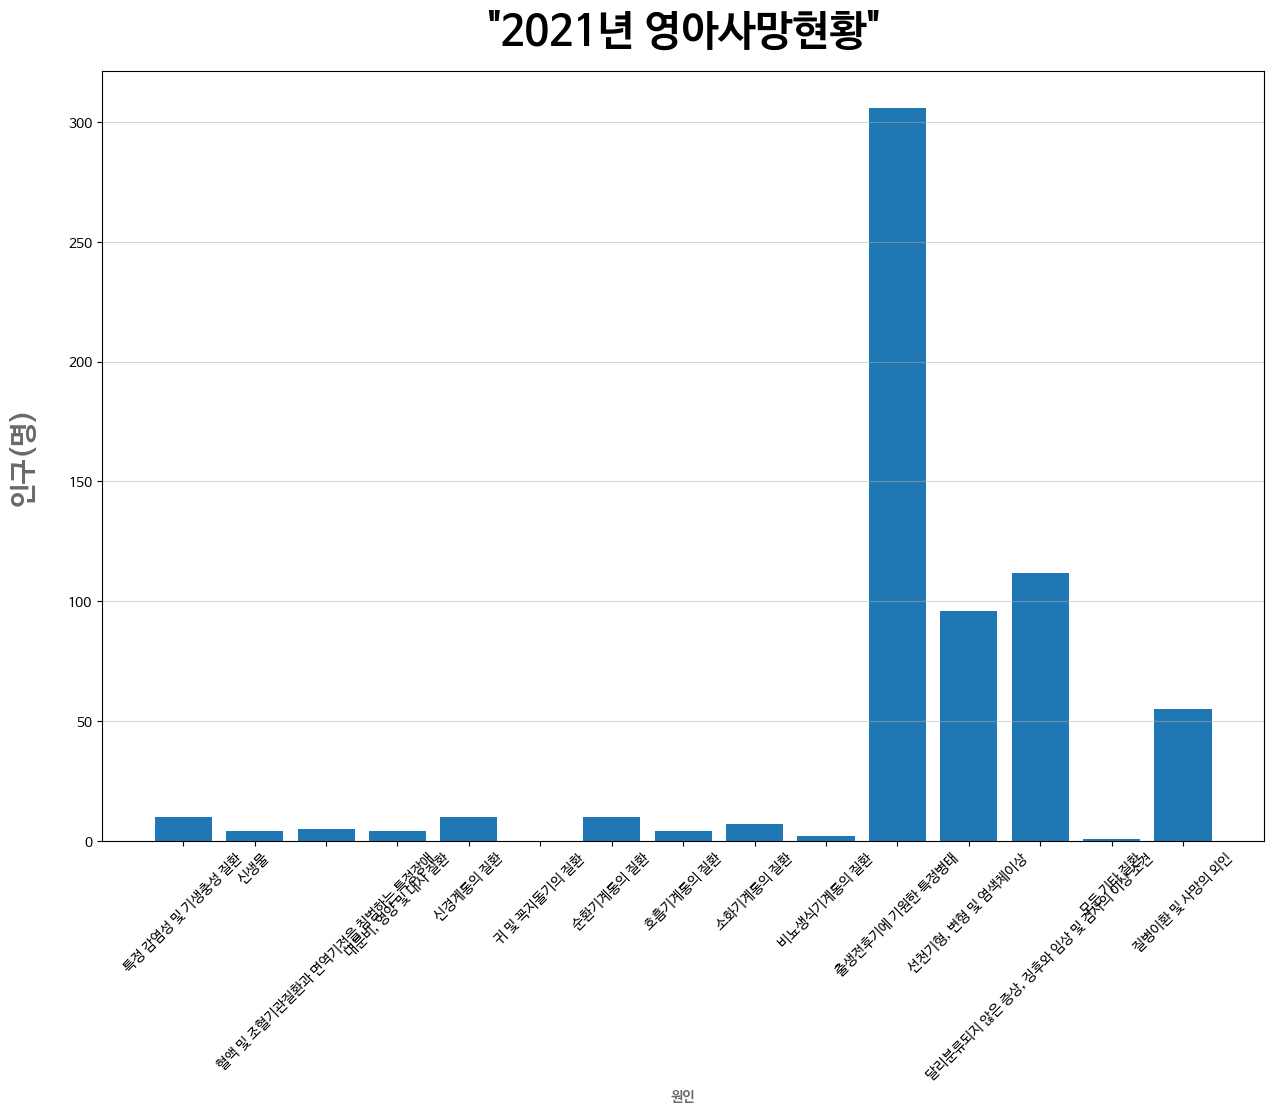

In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

x = df['영아사망원인']
y = df['2021']

plt.figure(figsize = (15, 10), facecolor = 'white')
plt.bar(x, y)

plt.title(f'"2021년 영아사망현황"', fontdict = {'size': 30, 'color': 'black', 'weight': 'bold'}, pad = 20)

plt.xlabel('원인', fontdict = {'size': 10, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)
plt.grid(True, axis = 'y', alpha = 0.5)

plt.show()

#2021년을 기점으로 10년 전 영아 사망원인 변화를 선그래프로 시각화하기

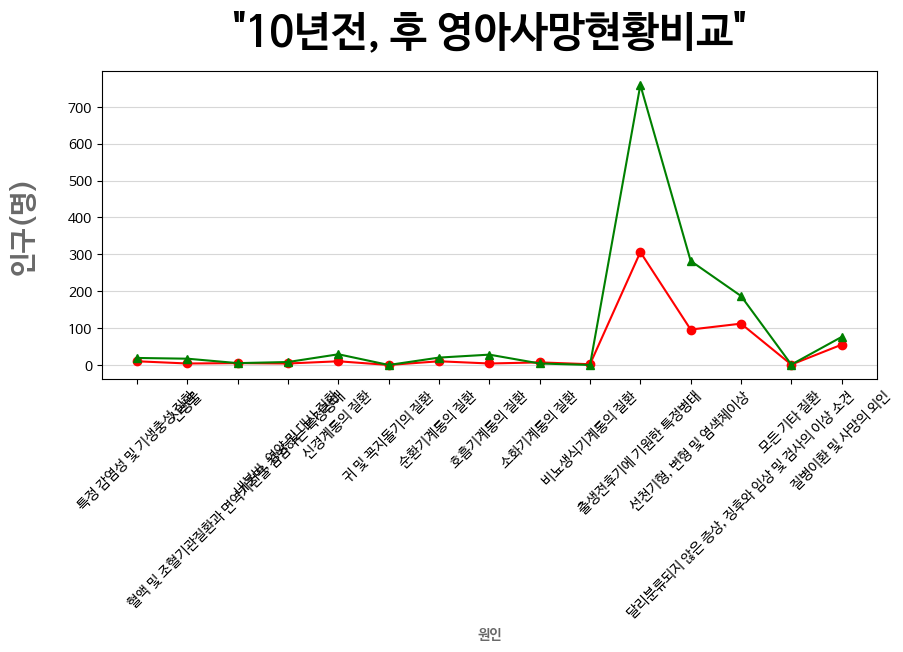

In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

x = df['영아사망원인']
y1 = df['2021']
y2 = df['2011']


plt.plot(x, y1, 'o', linestyle='solid', c='r', label='2021년')
plt.plot(x, y2, '^', linestyle='solid', c='g', label='2011년')

plt.title(f'"10년전, 후 영아사망현황비교"', fontdict = {'size': 30, 'color': 'black', 'weight': 'bold'}, pad = 20)

plt.xlabel('원인', fontdict = {'size': 10, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)
plt.grid(True, axis = 'y', alpha = 0.5)

plt.show()

#10년 비교를 막대그래프와 선그래프로 표현하기

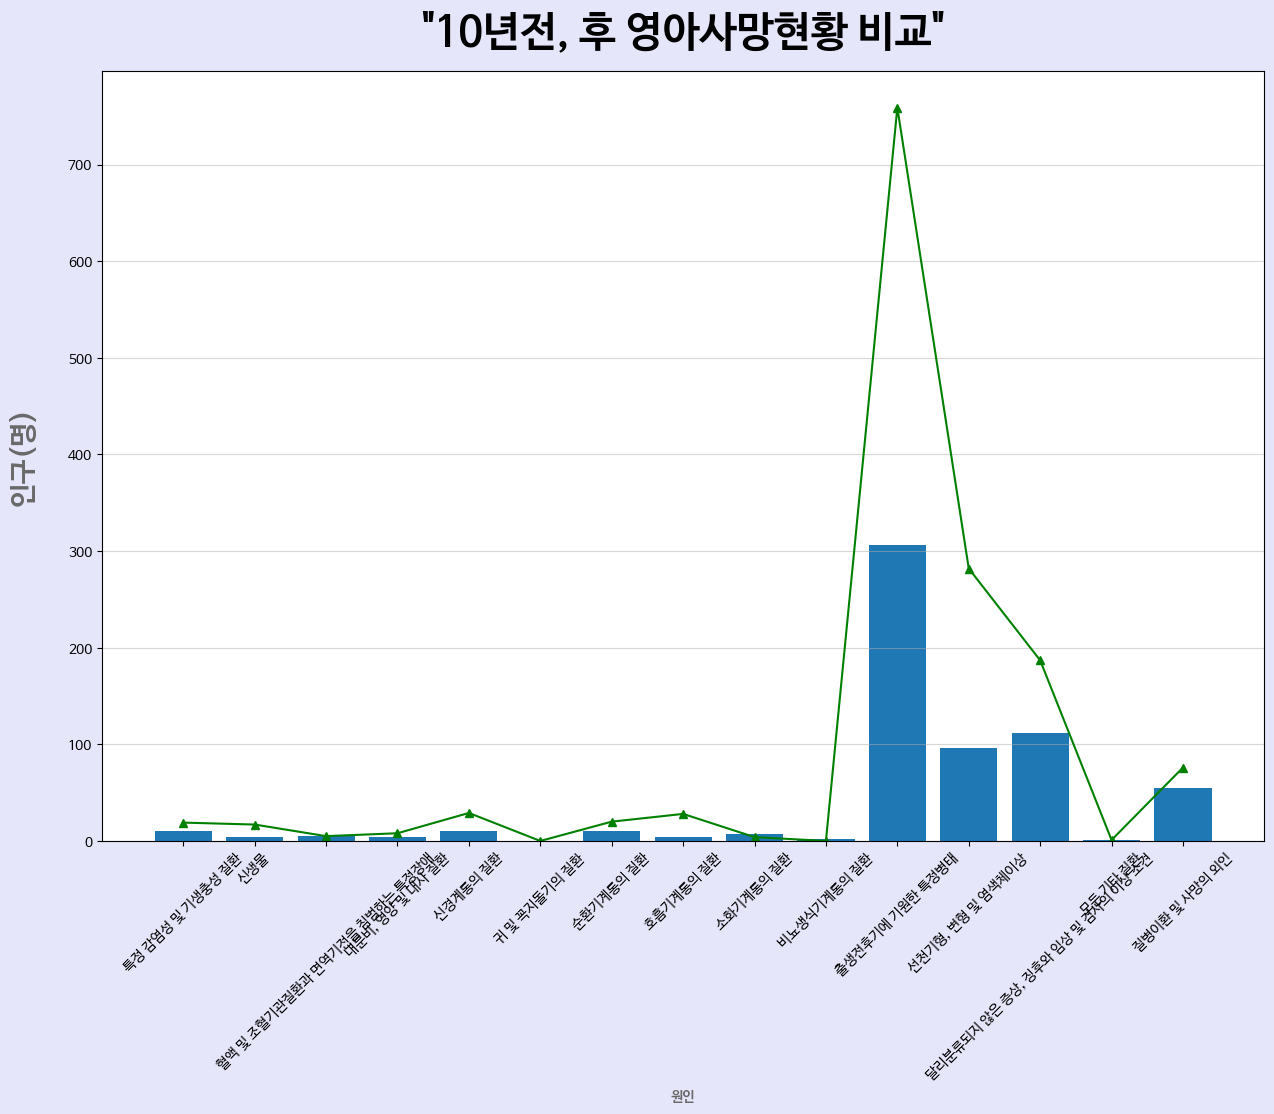

In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

x = df['영아사망원인']
y1 = df['2021']
y2 = df['2011']

plt.figure(figsize = (15, 10), facecolor = 'lavender')
plt.bar(x, y1)
plt.plot(x, y2, '^', linestyle='solid', c='g', label='2012년')

plt.title(f'"10년전, 후 영아사망현황 비교"', fontdict = {'size': 30, 'color': 'black', 'weight': 'bold'}, pad = 20)

plt.xlabel('원인', fontdict = {'size': 10, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)
plt.grid(True, axis = 'y', alpha = 0.5)

plt.show()

2011년에 비해 2021년도 영아사망율이 급격히 늘었을꺼라 생각했는데, 표를 완성하여 확인하니 떨어진 결과를 볼 수 있었다.
해당년도의 영아들 인구수 대비로 확인을 해야 정확한 자료를 얻을 수 있을 것 같다.

###파일 2개 합치기
file1 = "지역별생활폐기물량.csv"
df1 = pd.read_csv(file1, encoding = 'utf-8')
file2 = "지역별인구.csv"
df2 = pd.read_csv(file2, encoding = 'utf-8')
# 두 데이터프레임을 가로로 합치기
merged_df = pd.concat([df1, df2], axis=1)
# 새로운 CSV 파일로 저장
merged_file_path = '인구수와 생활폐기물.csv'
merged_df.to_csv(merged_file_path, index=False)
merged_df

-----------------------------------------